# <center><u><font color="#4937ed">Early Hospital Mortality Prediction Using Vital Signals</font></u></center>

## <font color="#4937ed"><strong> **Import all the necessary modules for the project** </strong></font>

In [31]:
# Import libraries
import pandas as pd
import numpy as np

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', None)

#Machine Learning Libraries for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# performance evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_curve, auc

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# <center><u><font color="#4937ed">Load The Dataset</font></u></center>

In [32]:
# import the dataset and check top 10 rows of the data
data = pd.read_csv('UCI_data.csv')
data.head(10)

,max,min,mean,median,mode,std,var,range(max-min),kurtosis,skewness,energy,periodogramPower,Alive
0,"90,05960586","73,55382064","81,24029265","81,44878737","73,55382064","1,617892118","2,617574906","16,50578521","9,292756769","-0,154890245","6602,602021","3969,96922",1
1,"101,4520966","98,82286024","99,9188394","99,76534296","99,86087198","0,710043347","0,504161555","2,629236401","2,322184963","0,473995651","9984,278488","6364,847922",1
2,"55,90546649","45,7646824","49,34735393","49,55562619","45,7646824","0,926873933","0,859095287","10,14078409","16,90803469","1,642760275","2436,020204","1464,660931",1
3,"73,18767351","70,97361844","72,05845831","72,05720633","72,13385171","0,542807092","0,294639539","2,214055075","2,554134722","0,135686496","5192,715971","3310,305233",1
4,"69,70191931","66,19022494","68,53371679","68,49319633","68,25215218","0,851760305","0,725495617","3,511694373","3,158083032","-0,746383044","4697,595631","2994,900315",1
5,"86,25214332","70,47181725","74,60441159","74,67838171","74,7423502","1,560400484","2,43484967","15,78032607","20,83442697","2,848066914","5568,252424","3348,15592",1
6,"48,89530686","45,47687861","46,87552551","46,54651486","47,75728964","1,085978653","1,179349634","3,418428246","1,637129346","0,274739604","2198,493914","1402,045348",1
7,"144,5915862","118,1667349","127,9053983","127,7138173","118,1667349","1,878980341","3,530567122","26,42485124","41,27162089","3,618197844","16363,32052","9837,35209",1
8,"105,6385827","86,17100866","90,55315117","90,33257666","88,98582859","1,957379975","3,831336368","19,46757407","24,05214061","3,522024039","8203,703494","4932,958436",1
9,"149,1670221","114,0800753","122,2362004","119,0157292","114,0800753","6,676029586","44,56937103","35,08694681","2,987836508","0,700836477","14986,24607","9030,14058",1


## <font color="#4937ed"><strong> First Step:
### <font color="#4937ed"><strong> Start with the data exploration and data visualization in order to understand the data

## <font color="#4937ed"><strong>  Dataset Information

In [33]:
# check the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725 entries, 0 to 2724
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   max               2725 non-null   object
 1   min               2725 non-null   object
 2   mean              2725 non-null   object
 3   median            2725 non-null   object
 4   mode              2725 non-null   object
 5   std               2725 non-null   object
 6   var               2725 non-null   object
 7   range(max-min)    2725 non-null   object
 8   kurtosis          2724 non-null   object
 9   skewness          2724 non-null   object
 10  energy            2725 non-null   object
 11  periodogramPower  2725 non-null   object
 12  Alive             2725 non-null   int64 
dtypes: int64(1), object(12)
memory usage: 276.9+ KB


In [34]:
# List of column names to convert
columns_to_convert = ['max', 'min', 'mean', 'median ', 'mode', 'std', 'var', 'range(max-min)',
       'kurtosis', 'skewness', 'energy', 'periodogramPower']

# Remove commas and convert object column to float
for col in columns_to_convert:
    data[col] = data[col].str.replace(',', '').astype(float)

In [35]:
# Set display options to show full numbers, not scientific notation
pd.options.display.float_format = '{:.2f}'.format

# description about the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
max,2725.00,5668011677.54,3399135299.48,80.00,1189916799.00,7088753124.00,8411803586.00,9996044241.00
min,2725.00,6050175556.28,2953737428.98,70.00,5189586226.00,6997639545.00,8185295412.00,9997361844.00
mean,2725.00,6059651034.74,3111553043.00,80.00,4515105809.00,7149391575.00,8350509743.00,9994445818.00
median,2725.00,6048722707.28,3124487995.56,80.00,4415523466.00,7125687309.00,8375118023.00,9997796429.00
mode,2725.00,6053492796.86,3041743434.00,78.00,5046995669.00,7076784227.00,8283671202.00,9999389059.00
std,2725.00,1262779041.83,1272978765.86,0.00,385997215.00,1011642057.00,1640489807.00,9688191341.00
var,2725.00,1672580517.85,1990446531.04,0.00,202315466.00,1042240416.00,2321843674.00,9998484444.00
range(max-min),2725.00,2453828838.14,2030492174.72,0.00,1244527513.00,1856760663.00,3054752303.00,9976480247.00
kurtosis,2724.00,2484757006.20,1566431703.36,336567.00,1673499404.50,2081102312.50,3027450424.75,9992783962.00
skewness,2724.00,709789531.69,1571886762.55,-2886353194.00,-179262370.75,144780934.00,958386369.00,6312996028.00


In [36]:
# Calculate descriptive statistics for 'Passed away' patients and 'Alive' patients
passed_away_stats = data[data['Alive'] == 0].drop('Alive', axis=1).describe()
alive_stats = data[data['Alive'] == 1].drop('Alive', axis=1).describe()

# Create a DataFrame for the final table
feature_names = data.columns[:-1]
statistics = ['Maximum', 'Minimum', 'Mean', 'Median', 'Mode', 'Standard deviation', 'Variance', 'Range', 'Kurtosis', 'Skewness', 'Averaged power', 'Energy spectral density']

result_df = pd.DataFrame(columns=['Column', 'Feature', 'Passed away patients', 'Alive patients'])

for idx, feature in enumerate(feature_names):
    row = [
        idx + 1,
        statistics[idx],
        passed_away_stats[feature]['mean'],
        alive_stats[feature]['mean']
    ]
    result_df.loc[idx] = row

# Print the formatted table
print("Descriptive Statistics for Statistical and Signal-Based Features")
result_df

Descriptive Statistics for Statistical and Signal-Based Features


,Column,Feature,Passed away patients,Alive patients
0,1,Maximum,5050943808.11,5755388694.66
1,2,Minimum,5777161816.85,6088834393.28
2,3,Mean,5564238252.78,6129801650.71
3,4,Median,5714060389.54,6096111003.63
4,5,Mode,5526528967.68,6128111051.68
5,6,Standard deviation,1375476930.38,1246820983.05
6,7,Variance,1867932602.20,1644918597.23
7,8,Range,2378038750.86,2464560739.90
8,9,Kurtosis,2502119692.22,2482297413.63
9,10,Skewness,847063375.10,690343362.75


Number of samples in the dataset:  2725
Number of features in the dataset:  13
Number of missing values in the dataset:  2
Labels:  [1 0]


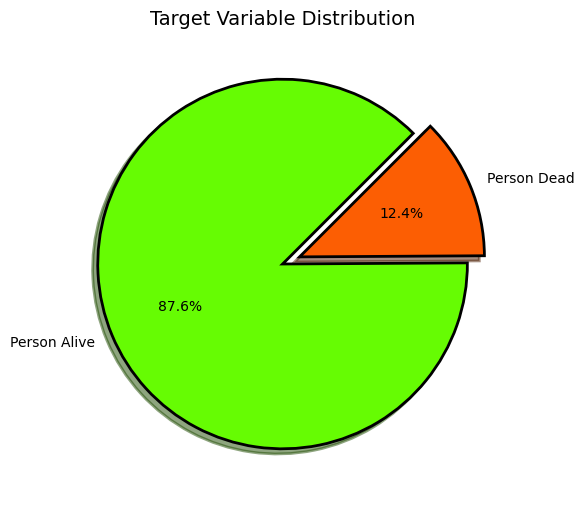

In [37]:
# Number of samples in dataset
print ("Number of samples in the dataset: ", len(data))

# Number of features in dataset
print ("Number of features in the dataset: ", len(data.columns))

# Number of Missing Values in dataset
print ("Number of missing values in the dataset: ", data.isna().sum().sum())

# Show labels
print ("Labels: ", data['Alive'].unique())

# Label "1" means "person alive" and label "0" means "person dead"

# Pie Chart with the percentage of samples for each label
values = list(data['Alive'].value_counts())
mylabels = ["Person Alive", "Person Dead"]

# Define custom colors for the pie chart
colors = ['#66fc03', '#fc5e03']

plt.figure(figsize=(6, 6))
plt.pie(values, labels=mylabels, colors=colors, autopct="%1.1f%%",explode = [0,0.1], startangle = 45, shadow = True,
       wedgeprops={"edgecolor":"k",'linewidth': 2,})
plt.title('Target Variable Distribution', fontsize=14)

plt.show()

## <font color="#4937ed"><strong> Second Step:
### <font color="#4937ed"><strong>Prepare the data for the machine learning model

In [38]:
# Drop samples containing missing values
drop_missing_values = data.dropna()

# Save the cleaned data to a new CSV file
cleaned_csv_path = 'cleaned_dataset.csv'
drop_missing_values.to_csv(cleaned_csv_path, index=False)

# Taking into account that there are only 2 missing values in the dataset and that they are in the same sample,
# it is better to drop the sample containing the 2 missing values, 
# because a model trained with the removal of all missing values will create a robust model.

# Load new dataset
new_data = pd.read_csv('cleaned_dataset.csv')

# Number of samples in the new dataset
print ("Number of samples in the dataset: ", len(new_data))

# Number of Missing Values in the new dataset
print ("Number of missing values in the dataset: ", new_data.isna().sum().sum())

Number of samples in the dataset:  2724
Number of missing values in the dataset:  0


### <font color="#4937ed"> **Separate the variables into feature matrix (X) and target variable (y).**

In [39]:
X=new_data.values[:,0:-1] # extract all features except the last one because it will be the label
y=new_data.values[:,-1] # extract the last column as the label

### <font color="#4937ed"> Split the data into training(60%), testing(20%) and validation sets(20%)

In [40]:
# Split the data into training(60%), testing(20%) and validation sets(20%)
# (The initial idea was splitting the data into 70%, 15%, 15% but due to an error presented in the article I decided to change to 60%, 20%, 20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

# Show the number of samples in each set
print("Number of samples in training set: ", len(X_train))
print("Number of samples in testing set: ", len(X_test))
print("Number of samples in validation set: ", len(X_val))

# Show the number of samples for each label (alive(1)/dead(0)) in each set
print("\n\nNumber of samples for each label in training set:\n", np.unique(y_train, return_counts=True))
print("\nNumber of samples for each label in testing set:\n", np.unique(y_test, return_counts=True))
print("\nNumber of samples for each label in validation set:\n", np.unique(y_val, return_counts=True))

Number of samples in training set:  1634
Number of samples in testing set:  545
Number of samples in validation set:  545


Number of samples for each label in training set:
 (array([0., 1.]), array([ 187, 1447]))

Number of samples for each label in testing set:
 (array([0., 1.]), array([ 87, 458]))

Number of samples for each label in validation set:
 (array([0., 1.]), array([ 64, 481]))


## <u><center><font color="#4937ed"> Building ML Classification Model Function

In [41]:
# Define a function to build and evaluate the model
def build_model(model, model_name, X_train, y_train, X_val, y_val):
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Test the model on the test data
    y_pred = model.predict(X_val)
    
    # Compute evaluation metrics
    acc = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    auc_score = auc(fpr, tpr)
    
    # Print evaluation metrics
    print('-' * 80)
    print(f'Model: {model_name}')
    print(f'Accuracy: {acc:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1-score: {f1:.3f}')
    print(f'AUC: {auc_score:.3f}')
    
    # Print accuracy score
    dash = '-' * 120
    print(dash)
    print(f"\t\t  The Accuracy Score : %0.3f\n" % acc)
    # Print report precision, recall, f1 score, support
    print(classification_report(y_val, y_pred))
    # Print confusion matrix
    print(f"\t\t\tCoufusion Matrix")
    sns.heatmap(confusion_matrix(y_pred, np.array(y_val)),fmt=".0f", 
                annot=True,linewidths=0.2, cmap='PiYG', xticklabels= ["Person Alive", "Person Dead"],
           yticklabels= ["Person Alive", "Person Dead"])
    plt.xlabel("Predicted")
    plt.ylabel("Actually")
    plt.show()
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(f'{model_name} ROC curve')
    plt.legend()
    plt.show()
    print(dash)
    
    # Return evaluation metrics
    return {
        'Model Name': model_name,
        'Accuracy Score': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': auc_score,
        'fpr' : fpr,
        'tpr' : tpr
    }

# <center><u><font color="4937ed"> Decision Tree Classifier

--------------------------------------------------------------------------------
Model: Decision Tree Classifier
Accuracy: 0.769
Precision: 0.877
Recall: 0.859
F1-score: 0.868
AUC: 0.476
------------------------------------------------------------------------------------------------------------------------
		  The Accuracy Score : 0.769

              precision    recall  f1-score   support

         0.0       0.08      0.09      0.09        64
         1.0       0.88      0.86      0.87       481

    accuracy                           0.77       545
   macro avg       0.48      0.48      0.48       545
weighted avg       0.78      0.77      0.78       545

			Coufusion Matrix


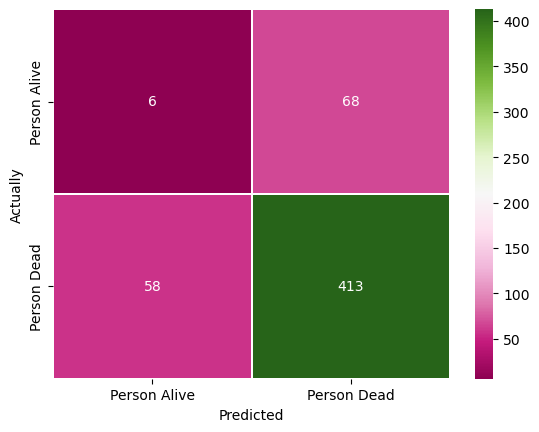

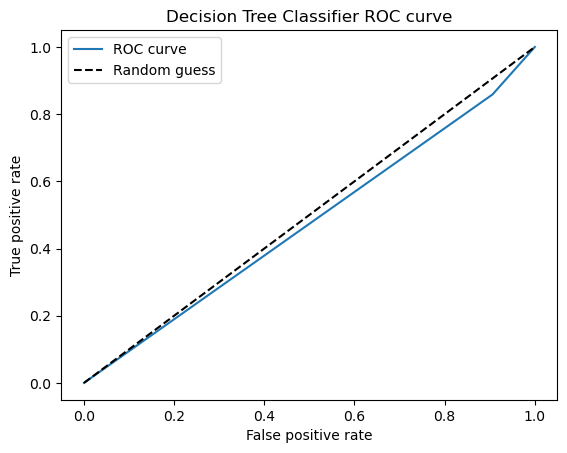

------------------------------------------------------------------------------------------------------------------------


In [42]:
result_1 = build_model(DecisionTreeClassifier(), 'Decision Tree Classifier', X_train, y_train, X_val, y_val)


# <center><u><font color="4937ed"> Random Forest Classifier

--------------------------------------------------------------------------------
Model: Random Forest Classifier
Accuracy: 0.881
Precision: 0.882
Recall: 0.998
F1-score: 0.937
AUC: 0.499
------------------------------------------------------------------------------------------------------------------------
		  The Accuracy Score : 0.881

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        64
         1.0       0.88      1.00      0.94       481

    accuracy                           0.88       545
   macro avg       0.44      0.50      0.47       545
weighted avg       0.78      0.88      0.83       545

			Coufusion Matrix


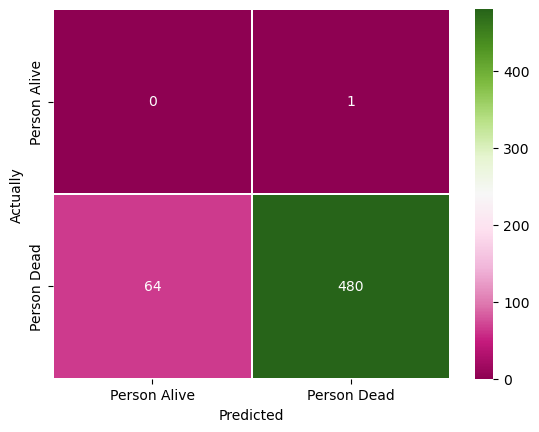

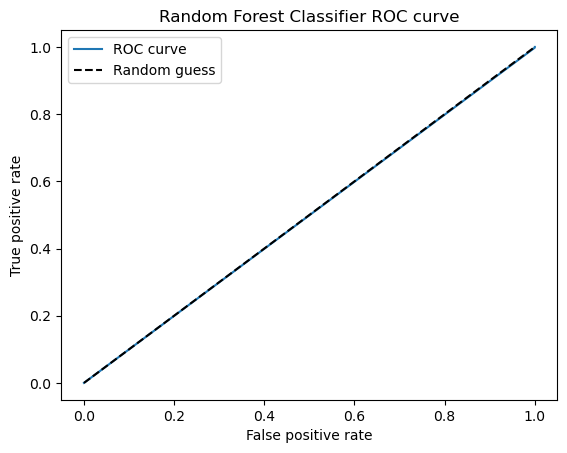

------------------------------------------------------------------------------------------------------------------------


In [43]:
result_2 = build_model(RandomForestClassifier(), 'Random Forest Classifier' , X_train, y_train, X_val, y_val)

# <center><u><font color="4937ed"> KNeighbors Classifier

--------------------------------------------------------------------------------
Model: KNeighbors Classifier
Accuracy: 0.861
Precision: 0.881
Recall: 0.973
F1-score: 0.925
AUC: 0.494
------------------------------------------------------------------------------------------------------------------------
		  The Accuracy Score : 0.861

              precision    recall  f1-score   support

         0.0       0.07      0.02      0.03        64
         1.0       0.88      0.97      0.92       481

    accuracy                           0.86       545
   macro avg       0.48      0.49      0.48       545
weighted avg       0.79      0.86      0.82       545

			Coufusion Matrix


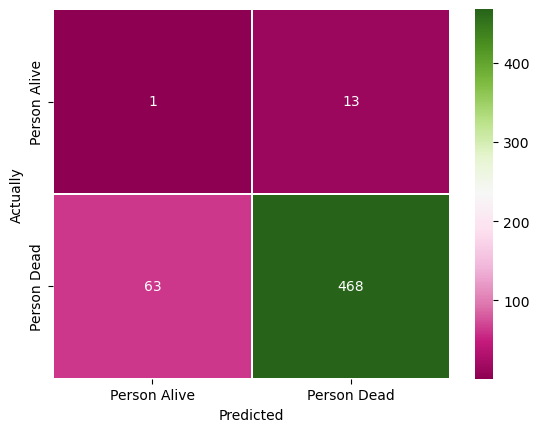

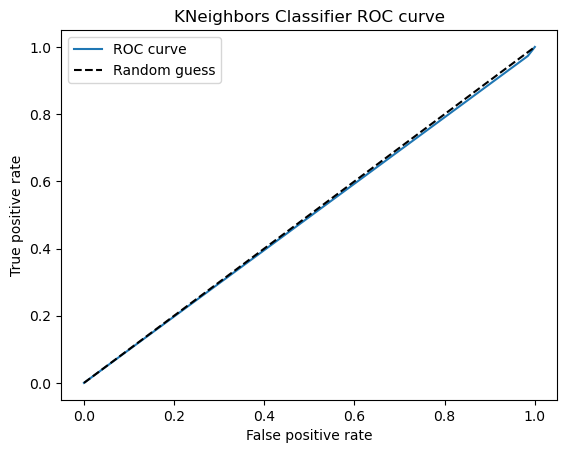

------------------------------------------------------------------------------------------------------------------------


In [44]:
result_3 = build_model(KNeighborsClassifier(), 'KNeighbors Classifier' , X_train, y_train, X_val, y_val)

# <center><u><font color="4937ed"> Linear SVM

--------------------------------------------------------------------------------
Model: Linear SVM
Accuracy: 0.883
Precision: 0.883
Recall: 1.000
F1-score: 0.938
AUC: 0.500
------------------------------------------------------------------------------------------------------------------------
		  The Accuracy Score : 0.883

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        64
         1.0       0.88      1.00      0.94       481

    accuracy                           0.88       545
   macro avg       0.44      0.50      0.47       545
weighted avg       0.78      0.88      0.83       545

			Coufusion Matrix


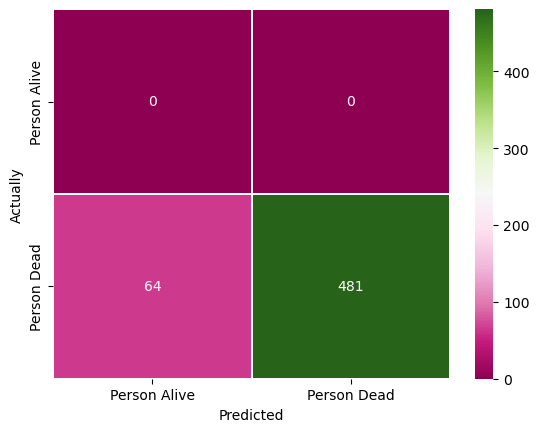

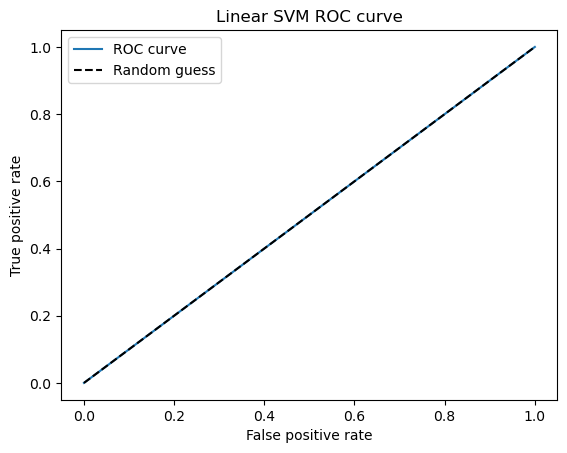

------------------------------------------------------------------------------------------------------------------------


In [45]:
result_4 = build_model(SVC(), 'Linear SVM' , X_train, y_train, X_val, y_val)

# <center><u><font color="4937ed"> Gaussian SVM

--------------------------------------------------------------------------------
Model: Gaussian SVM
Accuracy: 0.883
Precision: 0.883
Recall: 1.000
F1-score: 0.938
AUC: 0.500
------------------------------------------------------------------------------------------------------------------------
		  The Accuracy Score : 0.883

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        64
         1.0       0.88      1.00      0.94       481

    accuracy                           0.88       545
   macro avg       0.44      0.50      0.47       545
weighted avg       0.78      0.88      0.83       545

			Coufusion Matrix


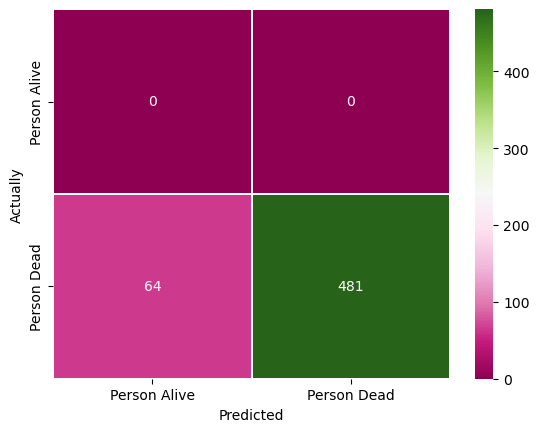

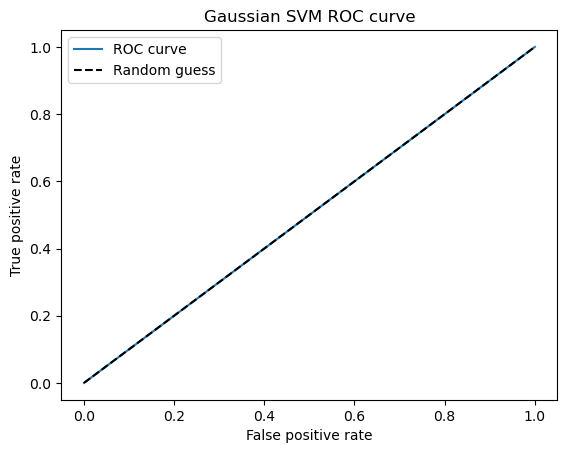

------------------------------------------------------------------------------------------------------------------------


In [46]:
result_5 = build_model(SVC(kernel='rbf'), 'Gaussian SVM' , X_train, y_train, X_val, y_val)

# <center><u><font color="4937ed"> Logistic Regression

--------------------------------------------------------------------------------
Model: Logistic Regression
Accuracy: 0.883
Precision: 0.883
Recall: 1.000
F1-score: 0.938
AUC: 0.500
------------------------------------------------------------------------------------------------------------------------
		  The Accuracy Score : 0.883

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        64
         1.0       0.88      1.00      0.94       481

    accuracy                           0.88       545
   macro avg       0.44      0.50      0.47       545
weighted avg       0.78      0.88      0.83       545

			Coufusion Matrix


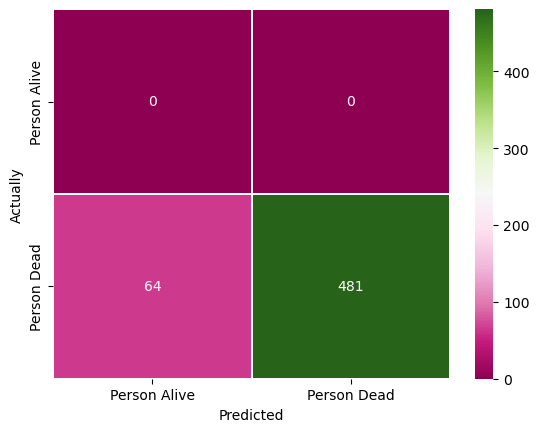

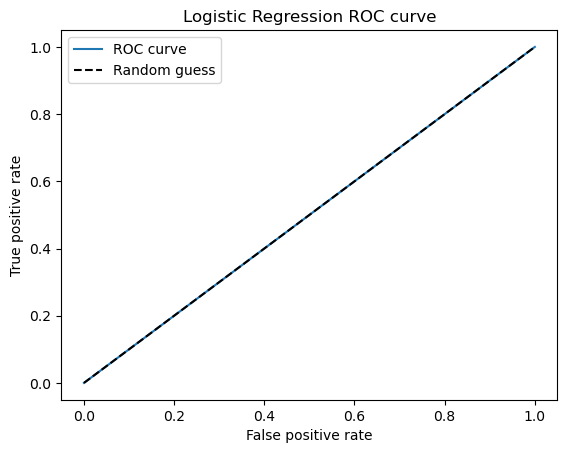

------------------------------------------------------------------------------------------------------------------------


In [47]:
result_6 = build_model(LogisticRegression(), 'Logistic Regression' , X_train, y_train, X_val, y_val)

# <center><u><font color="4937ed"> Linear Discriminant

--------------------------------------------------------------------------------
Model: Linear Discriminant
Accuracy: 0.883
Precision: 0.883
Recall: 1.000
F1-score: 0.938
AUC: 0.500
------------------------------------------------------------------------------------------------------------------------
		  The Accuracy Score : 0.883

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        64
         1.0       0.88      1.00      0.94       481

    accuracy                           0.88       545
   macro avg       0.44      0.50      0.47       545
weighted avg       0.78      0.88      0.83       545

			Coufusion Matrix


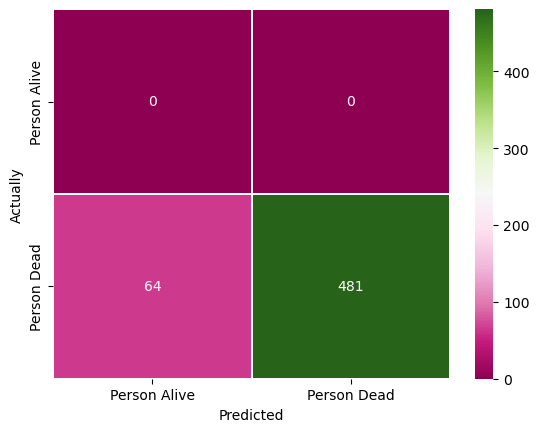

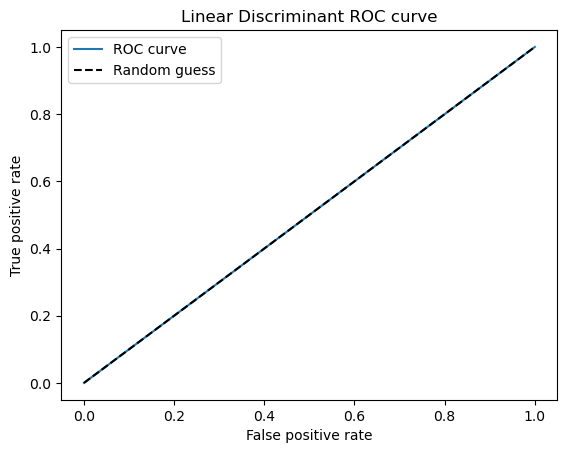

------------------------------------------------------------------------------------------------------------------------


In [48]:
result_7 = build_model(LinearDiscriminantAnalysis(), 'Linear Discriminant' , X_train, y_train, X_val, y_val)

# <center><u><font color="4937ed"> Boosted Tree

--------------------------------------------------------------------------------
Model: Boosted Tree
Accuracy: 0.873
Precision: 0.881
Recall: 0.990
F1-score: 0.932
AUC: 0.495
------------------------------------------------------------------------------------------------------------------------
		  The Accuracy Score : 0.873

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        64
         1.0       0.88      0.99      0.93       481

    accuracy                           0.87       545
   macro avg       0.44      0.49      0.47       545
weighted avg       0.78      0.87      0.82       545

			Coufusion Matrix


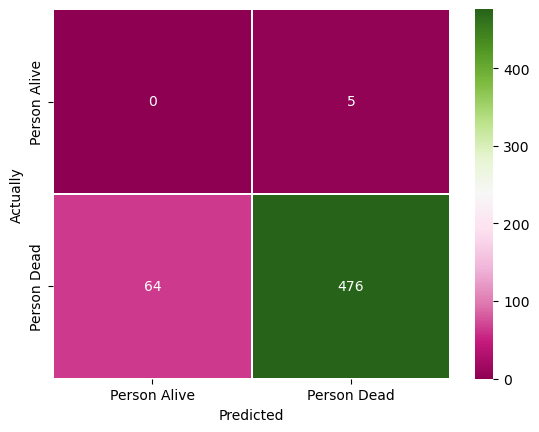

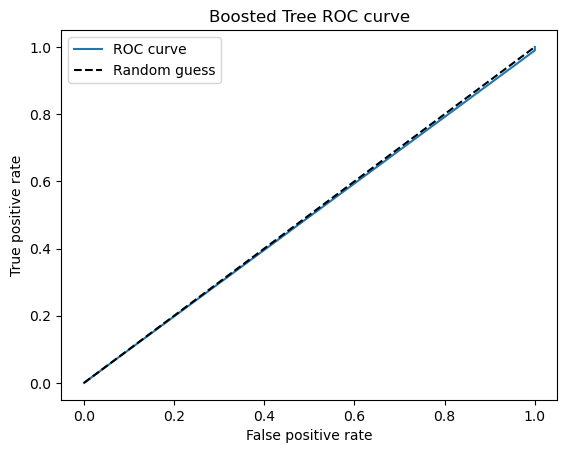

------------------------------------------------------------------------------------------------------------------------


In [49]:
result_8 = build_model(GradientBoostingClassifier(), 'Boosted Tree' , X_train, y_train, X_val, y_val)

## <u><font color="#4937ed"> Comparison of all Classification Model

In [50]:
# Combine all the result dictionaries into a list
all_results = [result_1, result_2, result_3, result_4, result_5, result_6, result_7, result_8]

# Create an empty list to store DataFrames for each result
dfs = []

# Convert each result dictionary to a DataFrame and store them in the list
for result in all_results:
    df = pd.json_normalize(result).set_index('Model Name')
    dfs.append(df)

# Concatenate all the DataFrames into one DataFrame
combined_metrics = pd.concat(dfs)

# Display the combined DataFrame
print("\n\033[1mAll Models Evaluation:\033[0m")
combined_metrics_show = combined_metrics[['Accuracy Score', 'Precision', 'Recall', 'F1-score', 'AUC']]
combined_metrics_show


All Models Evaluation:


,Accuracy Score,Precision,Recall,F1-score,AUC
Model Name,,,,,
Decision Tree Classifier,0.77,0.88,0.86,0.87,0.48
Random Forest Classifier,0.88,0.88,1.00,0.94,0.50
KNeighbors Classifier,0.86,0.88,0.97,0.92,0.49
Linear SVM,0.88,0.88,1.00,0.94,0.50
Gaussian SVM,0.88,0.88,1.00,0.94,0.50
Logistic Regression,0.88,0.88,1.00,0.94,0.50
Linear Discriminant,0.88,0.88,1.00,0.94,0.50
Boosted Tree,0.87,0.88,0.99,0.93,0.49


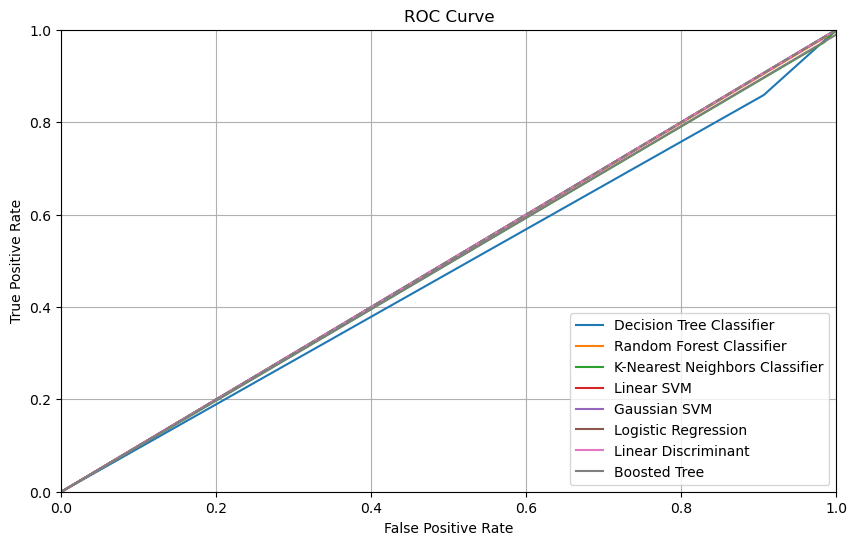

In [51]:
# my model names 
model_names = [
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "K-Nearest Neighbors Classifier",
    "Linear SVM",
    "Gaussian SVM",
    "Logistic Regression",
    "Linear Discriminant",
    "Boosted Tree"
]

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(len(model_names)):
    plt.plot(combined_metrics['fpr'][i], combined_metrics['tpr'][i], label=model_names[i])

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [52]:
# Create a bar chart using Plotly
fig = px.bar(combined_metrics_show, x=combined_metrics.index, y=["Accuracy Score", "Precision", "Recall", "F1-score"],
             barmode='group', title='Evaluation Metrics - All Models')
fig.update_layout(xaxis_tickangle=0, yaxis_title='Percentage', legend_title='Evaluation Metrics')
fig.show()